In [1]:
import os
import torch
import torchvision.transforms as transforms

from src.masked_dataset import MaskedDataset

In [10]:
transform = {    
    "image_normed": transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((512, 512)),
    ]),
    "mask": transforms.Lambda(lambda x: 
        torch.nn.functional.interpolate(x.float(), scale_factor=1, 
                                        mode='nearest').squeeze(0)),
    "image_raw": transforms.Compose([
        transforms.ToTensor(),       
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((512, 512)),
    ]),
}

img_dir ='/home/bobi/Desktop/db/ffhq-dataset/images1024x1024'
mask_dir = '/home/bobi/Desktop/face-parsing.PyTorch/res/masks'

ds = MaskedDataset(img_dir, mask_dir, transform)    
ds[0]['res_raw'].shape

torch.Size([1, 512, 512])

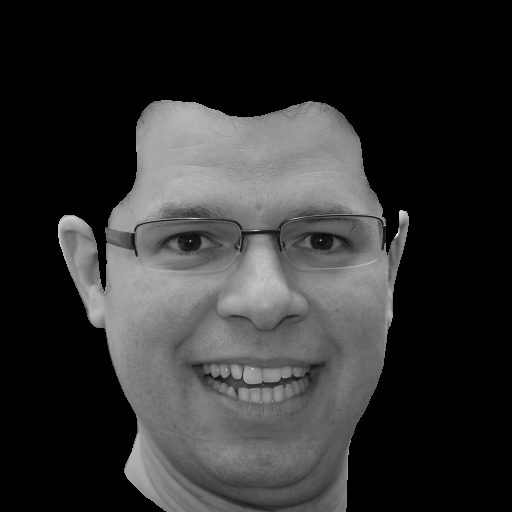

In [11]:
transforms.ToPILImage()(ds[1]['res_raw'])#.convert("RGB")